In [42]:
import tifffile
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
raw_dir = Path("../../data/raw")
raw_dir

WindowsPath('../../data/raw')

In [32]:
def get_tiffs(path: str):
    return list(Path(path).glob("*.tif"))

tiffs = get_tiffs(raw_dir)
tiffs[:5]

[WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,41397]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,42092]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,42787]_component_data.tif'),
 WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,43482]_component_data.tif')]

In [40]:
def extract_locations(path):
    start = path.name.find("_[") + 2
    stop = path.name.find("]_")
    x, y = path.name[start:stop].split(',')
    return int(x), int(y)


f = files[10]
f, extract_locations(f)

(WindowsPath('../../data/raw/ExPW021_PW162-A05_Scan1_[10275,47651]_component_data.tif'),
 (10275, 47651))

,X,Y
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif",10275,40702
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,41397]_component_data.tif",10275,41397
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42092]_component_data.tif",10275,42092
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42787]_component_data.tif",10275,42787
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,43482]_component_data.tif",10275,43482


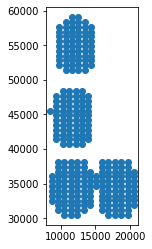

In [122]:
df = pd.DataFrame({f: extract_locations(f) for f in files}, index=["X", "Y"]).T.astype(int)
plt.scatter(x=df.X, y=df.Y)
plt.gca().set_aspect('equal')
df.head()

,X,Y,Label
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[18750,34641]_component_data.tif",18750,34641,3
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[9594,34630]_component_data.tif",9594,34630,0
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[16897,33251]_component_data.tif",16897,33251,3
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[19677,38115]_component_data.tif",19677,38115,3
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[9348,41397]_component_data.tif",9348,41397,1


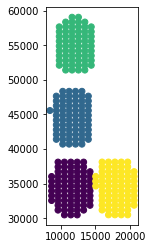

In [125]:
from sklearn.cluster import KMeans
df['Label'] = KMeans(n_clusters=4).fit_predict(df)
plt.scatter(df.X, df.Y, c=df.Label);
plt.gca().set_aspect('equal');
df.sample(5)

In [157]:
df['Category'] = df.Label.apply(lambda idx: "ABCD"[idx])
df.head()

,X,Y,Label,Category
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,40702]_component_data.tif",10275,40702,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,41397]_component_data.tif",10275,41397,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42092]_component_data.tif",10275,42092,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,42787]_component_data.tif",10275,42787,1,B
"..\..\data\raw\ExPW021_PW162-A05_Scan1_[10275,43482]_component_data.tif",10275,43482,1,B


In [163]:
from shutil import copy
for filename, row in df.iterrows():
    path = Path("../../data/processed/") / row['Category']
    path.mkdir(exist_ok=True, parents=True)
    new_filename = path / filename.name
    copy(filename, new_filename)
    